## **Classifying coronary artery disease using age, and blood cholesterol, and maximum heart rate.**

### Zirun Xu, Aura Balita, and Sahil Babani

## Introduction

Coronary artery disease (CAD) is a cardiovascular condition caused by the accumulation of plaque in the coronary arteries, which are responsible for delivering blood to the heart. This plaque buildup gradually narrows the arteries, leading to reduced blood flow to the heart. CAD can lead to abnormal heart rhythms, heart attacks, and heart failure (Cleveland Clinic, n.d.).
Fouree factors that increase the likelihood of heart disease are ag maximum heart rate,e, blood pressu, andnd blood cholesterol levels. Individuals aged 65 and older are more likely to develop CAD due to the buildup of plaque over the years (National Institute on Aging, n.d.), while elevated blood pressure and high blood cholesterol levels are indicative of narrowed blood vessels due to plaque accumulation (Centers for Disease Control and Prevention, n.d. Lastly, max heart rate achieved during exercise testing is typically indicative of how well the heart is functioning. A high maximum heart rate usually means a healthier heart, while a lower one can signify a heart that is less healthy.).

The aim of this project is to determine whether it is possible to predict the likelihood of an individual having heart disease based on their age, blood pres, and blood cholesterol le, and maximum heart rate and to determine which variable pairs would best give the best predictionsels, using the Cleveland data. ase.

This database was constructed by gathering clinical test results from patients with chest pain symptoms at the Cleveland Clinic in Cleveland, Ohio database (Detrano, et al., 89).

In [6]:
# Importing packages
library(tidyverse)
library(tidymodels)
library(knitr)
library(repr)

In [7]:
# Setting the seed
set.seed(1)

# Loading data, assigning column names, and data wrangling
heart <- read_csv("processed.cleveland.data", col_names = FALSE, show_col_types = FALSE)
colnames(heart) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                     "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart <- heart |>
    mutate(disease = as.factor(case_when(num > 0 ~ "Yes", num == 0 ~ "No"))) |>
    mutate(sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs),
           restecg = as.factor(restecg), exang = as.factor(exang), slope = as.factor(slope),
           ca = as.factor(ca), thal = as.factor(thal), num = as.factor(num))

# Converting "?" in cells into "NA"
heart[heart == "?"] <- NA

# Removing missing values
heart <- na.omit(heart)

head(heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Yes
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,No
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,No


In [8]:
# Splitting the data into the training and testing sets
heart_split <- initial_split(heart, prop = 0.75, strata = disease)  

heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

head(heart_train)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,No
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,No
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,No
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,No
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,No


In [9]:
# Summary of data
heart_summary <- heart_train |>
                 group_by(disease) |>
                 summarize(observations = n(), 
                           mean_age = mean(age), 
                           mean_trestbps = mean(trestbps),
                           mean_chol = mean(chol),
                           mean_thalach = mean(thalach))
heart_summary

disease,observations,mean_age,mean_trestbps,mean_chol,mean_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
No,120,52.57500,128.8417,245.3750,158.9500
Yes,102,56.84314,136.5000,248.6176,138.6471


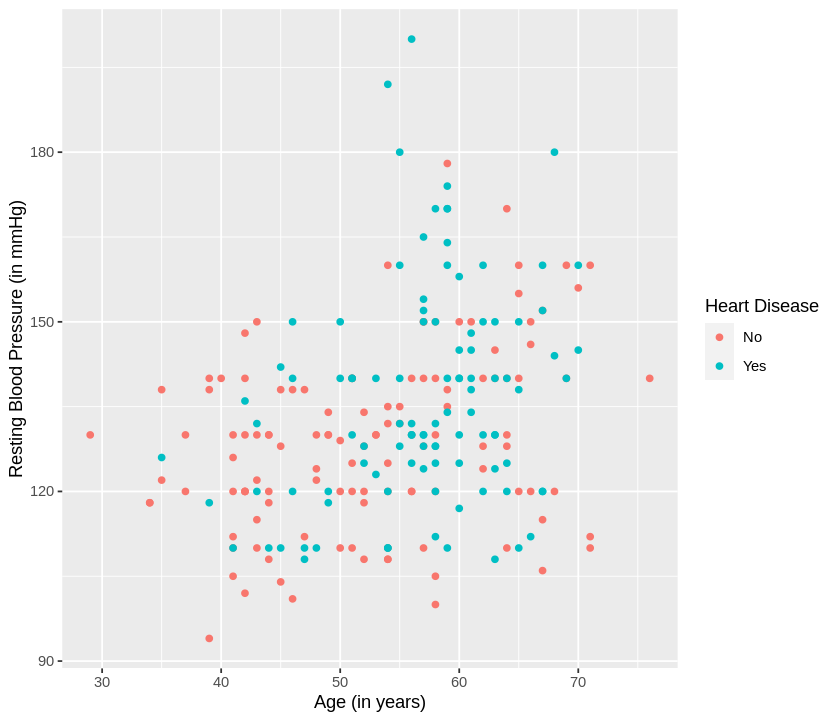

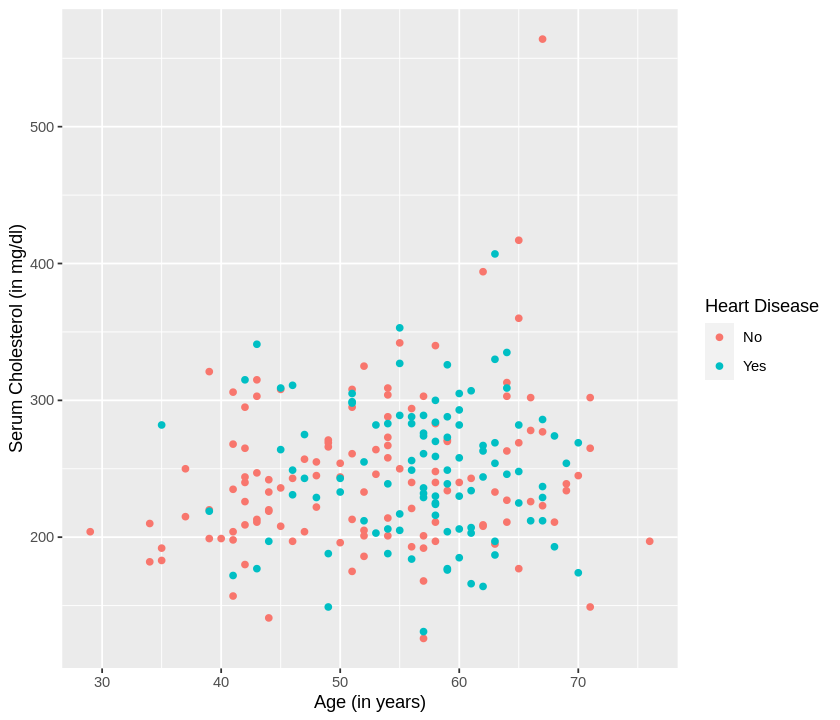

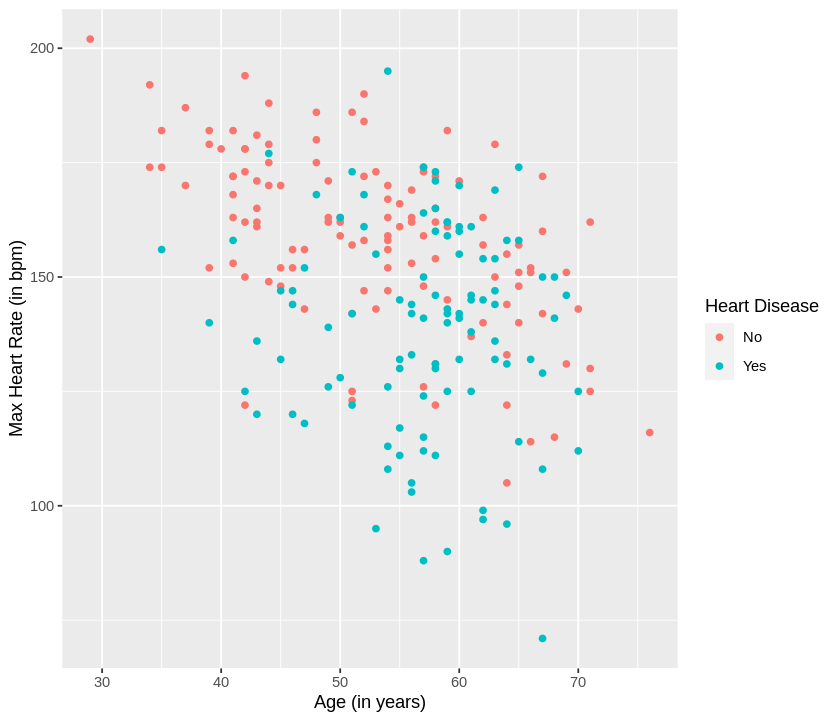

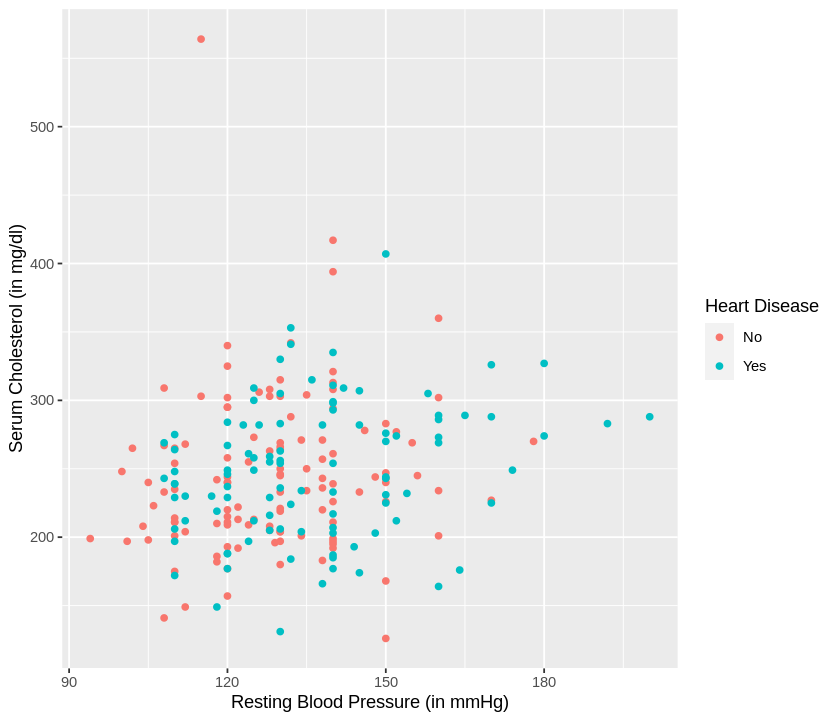

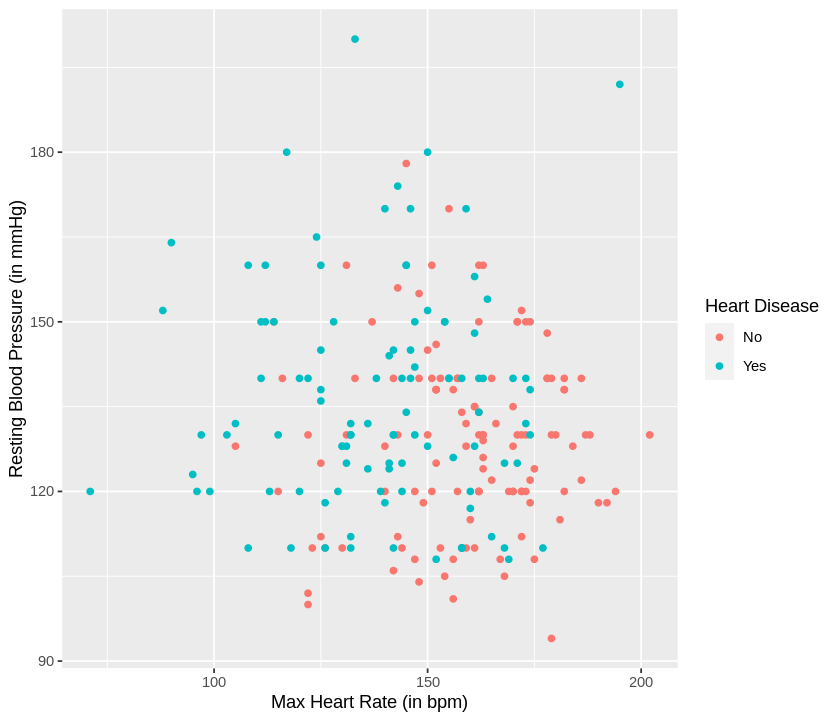

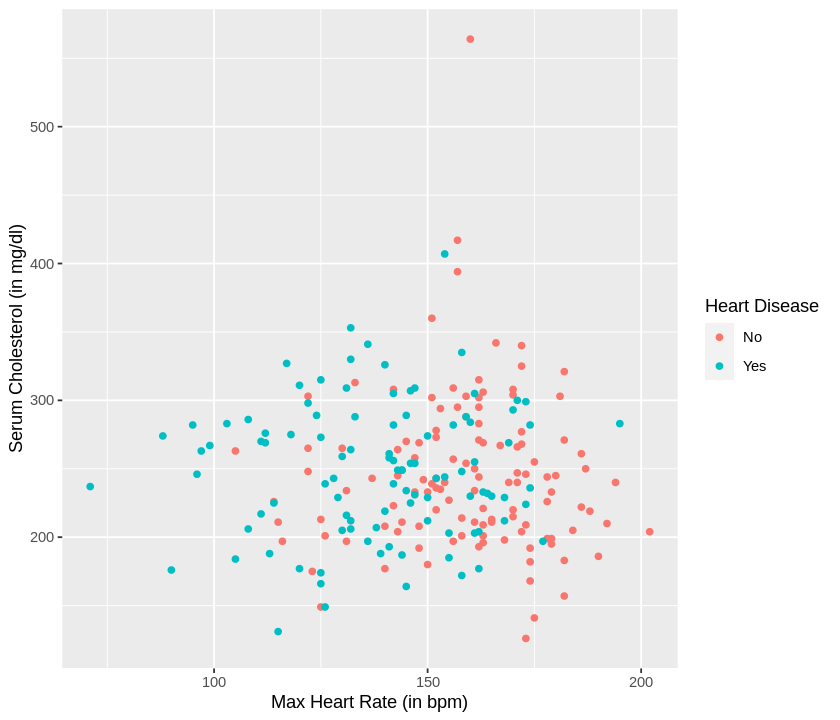

In [11]:
options(repr.plot.width = 7, repr.plot.height = 6)
### Plotting the training data to determine best predictors

# Resting Blood Pressure vs. Age
age_trestbps_plot <- heart_train |>
      ggplot(aes(x = age, y = trestbps, color = disease)) +
      geom_point()+
        labs(x = "Age (in years)", 
             y = "Resting Blood Pressure (in mmHg)", 
             color = "Heart Disease")
age_trestbps_plot

# Cholesterol Levels vs. Age
age_chol_plot <- heart_train |>
      ggplot(aes(x = age, y = chol , color = disease)) +
      geom_point()+
        labs(x = "Age (in years)", 
             y = "Serum Cholesterol (in mg/dl)", 
             color = "Heart Disease")
age_chol_plot

# Max Heart Rate vs. Age
age_thalach_plot <- heart_train |>
    ggplot(aes(x = age, y = thalach, color = disease)) +
    geom_point() +
        labs(x = "Age (in years)",
             y = "Max Heart Rate (in bpm)",
             color = "Heart Disease")
age_thalach_plot 

# Cholesterol Levels vs Resting Blood Pressure
trestbps_chol_plot <- heart_train |>
      ggplot(aes(x = trestbps, y = chol, color = disease)) +
      geom_point()+
        labs(x = "Resting Blood Pressure (in mmHg)", 
             y = "Serum Cholesterol (in mg/dl)", 
             color = "Heart Disease")
trestbps_chol_plot

# Resting Blood Pressure vs. Max Heart Rate
thalach_trestbps_plot <- heart_train |>
    ggplot(aes(x = thalach, y = trestbps, color = disease)) +
    geom_point() +
        labs(x = "Max Heart Rate (in bpm)",
             y = "Resting Blood Pressure (in mmHg)",
             color = "Heart Disease")
thalach_trestbps_plot

# Cholesterol Levels vs. Max Heart Rate
thalach_chol_plot <- heart_train |>
    ggplot(aes(x = thalach, y = chol, color = disease)) +
    geom_point() +
        labs(x = "Max Heart Rate (in bpm)",
             y = "Serum Cholesterol (in mg/dl)",
             color = "Heart Disease")
thalach_chol_plot

## Methods

The dataset we used is "processed.cleveland.data" that was originally collected using data from patient test results at the Cleveland Clinic in Cleveland.

The dataset constists 303 observations and 14 attributes, which are described below:

1. **age:** age in years
2. **sex:** sex of the individual (1 = male; 0 = female)
3. **cp:** chest pain type
4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol:** serum cholesterol in mg/dl
6. **fbs:** whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)
7. **restecg:** resting electrocardiographic results
8. **thalach:** maximum heart rate achieved
9. **exang:** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak:** ST depression induced by exercise relative to rest
11. **slope:** the slope of the peak exercise ST segment
12. **ca:** number of major vessels (0-3) colored by flourosopy
13. **thal:** thalassemia
14. **num:** diagnosis of heart disease (0 = not present; 1, 2, 3, 4 = present)

However, in this project, we will only be using the age, resting blood pressure, blood cholesterol, and diagnosis attributes:

* **age:** age in years
* **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
* **chol:** serum cholesterol in mg/dl
* **num:** diagnosis of heart disease (0 = not present; 1, 2, 3, 4 = present)

Data analysis was conducted by reading in the dataset into R and naming the object `heart`. A seed value was set to ensure that everything is reproducible. 

When the database was opened with the editor, no column names were found. Thus, each column name was renamed to their respective variables via the function `colnames()`. The data was also cleaned and wrangled into a tidy format by converting the missing data "?" into NA values, and then removing all missing values from the dataset using the `na.omit()` function.

The question we are addressing is to predict whether or not a patient will have heart disease or not based on their age, blood pressure, and blood cholesterol. Thus, a new column `disease` was created based on the variable **num**. For the case that **num** = 0, no heart disease occurs, and the `disease` observation will say "No". For the case that **num** = 1, 2, 3, 4, heart disease is present, and the `disease` observation will say "Yes".

75% of the `heart` data was split into the training set, while 25% of the data was used for the testing set via the function `initial_split()`. The training data set was also summarized by grouping by `disease`, and using `summarize()` to count the number of observations there were for whether heart disease was detected or not, as well as the average age, average blood pressure, and average blood cholesterol levels, and average maximum heart rate.

Six scatter plots were generated for visualization. The following variable pairs were compared:
* Resting Blood Pressure vs. Age
* Cholesterol Levels vs. Age
* Max Heart Rate vs. Age
* Cholesterol Levels vs Resting Blood Pressure
* Resting Blood Pressure vs. Max Heart Rate
* Cholesterol Levels vs. Max Heart Rate

Points were coloured based on `disease`. Through these plots, we found that blood pressure is not a good indicator of heart disease, as there seems to be no distinct regions of coloured points. However, the plots that included the max heart rate indicated three distinct regions: "Yes", "No", and a mix of both. 

Thus, age, cholesterol levels, and max heart rate will be used as our predictors of whether or not heart disease will be detected.

## Expected outcomes and significance

The expected outcomes for an individual with heart disease will typically have older, have high levels of cholesterol, and lower maximum heart rates.

A classification system for heart disease is of significant importance as it will aid doctors with early detection and diagnosis, and will thus increase the number of individuals saved, or will at least prolong their life.

Some future questions are:
1. How can we mitigate bias in heart disease classification algorithms to ensure equitable diagnosis and treatment for all patients.
2. What is the long-term impact of using heart disease classification models. Will it eventually replace doctors?
3. How accurate are disease classification models in general? How can they be improved?

## Bibliography

* Cleveland Clinic. “Coronary Artery Disease.” Cleveland Clinic, my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease. Accessed 27 Oct. 2023.
* “Coronary Artery Disease.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 19 July 2021,\
    www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=To%20find%20out%20your%20risk,about%20heart%20disease%20risk%20factors. * Detrano, R.C., Jánosi, A., Steinbrunn, W., Pfisterer, M.E., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the\
    diagnosis of coronary artery disease. The American journal of cardiology, 64 5, 304-10 .
* “Heart Health and Aging.” National Institute on Aging, U.S. Department of Health and Human Services, www.nia.nih.gov/health/heart-health-and-aging#:~:text=and%20bottom%20chambers.-,How%20Your%20Heart%20Changes%20with%20Age,heart%20disease)%20and%20heart%20failure. Accessed 27 Oct. 2023. 

